---
Projeto 04 - SVM - Flags
---

## Etapa 1: Importação das Bibliotecas

In [ ]:
#region Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")
#endregion

## Etapa 2: Manipulação do Dataset

In [ ]:
flags = pd.read_csv("dataset/flags_tratado.csv")

### Valores Únicos

In [ ]:
#region Identifica as religiões que aparecem apenas uma vez em cada continente
def findOccurrenceReligions(data, continent="landmass", religion="religion"):
    religionContinentCounts = data.groupby([continent, religion]).size().reset_index(name="count")

    singleOccurrenceReligions = religionContinentCounts[religionContinentCounts["count"] == 1]

    return singleOccurrenceReligions

#endregion

In [ ]:
single = findOccurrenceReligions(flags)

### Continentes

* 1 = N.America
* 2 = S.America
* 3 = Europe
* 4 = Africa
* 5 = Asia
* 6 = Oceania

In [ ]:
#region Mapeamentos para os rótulos de continentes
landmassMapping = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 0}

flags["landmass"] = flags["landmass"].replace(landmassMapping)
#endregion

In [ ]:
print(flags["landmass"].value_counts())

landmass
0    94
1    85
Name: count, dtype: int64


### Religiões

* 0 = Catholic
* 1 = Other Christian
* 2 = Muslim
* 3 = Buddhist
* 4 = Hindu
* 5 = Ethnic
* 6 = Others

In [ ]:
# [0, 1, 2, 3] -> com outliers
# [4, 5, 6, 7] -> sem outliers

config = 0

In [ ]:
if config not in range(0, 4):
    flags = flags.drop(index=single.index.to_list())

In [ ]:
#region Mapeamentos para os rótulos de religiões
if config in [0, 4]:
    # Cristã e Outras (94, 85)
    flags["religion"] = flags["religion"].replace([0, 1], 0)
    flags["religion"] = flags["religion"].replace([2, 3, 4, 5, 6], 1)
    binary = True
elif config in [1, 5]:
    # Monoteístas, Politeístas e Outras (136, 31, 12)
    flags["religion"] = flags["religion"].replace([0, 1, 2], 0)
    flags["religion"] = flags["religion"].replace([4, 5], 1)
    flags["religion"] = flags["religion"].replace([3, 6], 2)
    binary = False
elif config in [2, 6]:
    # Ocidental, Oriental e Outras (100, 48, 31)
    flags["religion"] = flags["religion"].replace([0, 1], 0)
    flags["religion"] = flags["religion"].replace([2, 3, 4], 1)
    flags["religion"] = flags["religion"].replace([5, 6], 2)
    binary = False
elif config in [3, 4]:
    # Cristã, Islâmica, Oriental e Outras (98, 35, 30, 11)
    flags["religion"] = flags["religion"].replace([0, 1], 0)
    flags["religion"] = flags["religion"].replace(2, 1)
    flags["religion"] = flags["religion"].replace([3, 4], 2)
    flags["religion"] = flags["religion"].replace([5, 6], 3)
    binary = False
# else:
#     # flagsTest = flagsTest[(flagsTest["religion"] != 1)]
#     flagsTest["religion"] = flagsTest["religion"].replace(1, 0)
#     flagsTest["religion"] = flagsTest["religion"].replace(2, 1)
#     flagsTest["religion"] = flagsTest["religion"].replace(5, 2)
#     flagsTest["religion"] = flagsTest["religion"].replace([3, 4, 6], 3)
#     binary = False
# else:
#     # flagsTest = flagsTest[(flagsTest["religion"] == 0) | (flagsTest["religion"] == 5)]
#     flagsTest = flagsTest[(flagsTest["religion"] == 0) | (flagsTest["religion"] == 1) | (flagsTest["religion"] == 2) | (flagsTest["religion"] == 5)]
#     flagsTest["religion"] = flagsTest["religion"].replace([0, 1], 0)
#     flagsTest["religion"] = flagsTest["religion"].replace(2, 1)
#     flagsTest["religion"] = flagsTest["religion"].replace(5, 2)
#     binary = False
# else:
#     # Muçulmano, Étnicas e Outras (36, 27, 16) - 77.38% / 68.75%
#     flagsTest = flagsTest[(flagsTest["religion"] != 0) & (flagsTest["religion"] != 1)]
#     flagsTest["religion"] = flagsTest["religion"].replace(2, 0)
#     flagsTest["religion"] = flagsTest["religion"].replace(5, 1)
#     flagsTest["religion"] = flagsTest["religion"].replace([3, 4, 6], 2)
#     binary = False
# else:
#     # Muçulmano e Outras (36, 43) - 77.38% / 75.00%
#     flagsTest = flagsTest[(flagsTest["religion"] != 0) & (flagsTest["religion"] != 1)]
#     flagsTest["religion"] = flagsTest["religion"].replace(2, 0)
#     flagsTest["religion"] = flagsTest["religion"].replace([3, 4, 5, 6], 1)
#     binary = False
# else:
#     # Muçulmano e Étnicas (36, 27) - 88.00% / 76.92%
#     flagsTest = flagsTest[(flagsTest["religion"] == 2) | (flagsTest["religion"] == 5)]
#     flagsTest["religion"] = flagsTest["religion"].replace(2, 0)
#     flagsTest["religion"] = flagsTest["religion"].replace(5, 1)
#     binary = True
#endregion

In [ ]:
print(flags["religion"].value_counts())

religion
0    100
1     79
Name: count, dtype: int64


### Linguagens

* 1: "English",
* 2: "Spanish",
* 3: "French",
* 4: "German",
* 5: "Slavic",
* 6: "Other Indo-European",
* 7: "Chinese",
* 8: "Arabic",
* 9: "Japanese/Turkish/Finnish/Magyar",
* 10: "Others"

In [ ]:
#region Mapeamentos para os rótulos de linguagens
flags["language"] = flags["language"].replace([7, 9], 10)

flags["language"] = flags["language"].replace([4, 5], 6)

languageMapping = {6: 4, 8: 5, 10: 6}

flags["language"] = flags["language"].replace(languageMapping)
#endregion

In [ ]:
print(flags["language"].value_counts())

language
6    48
1    43
4    32
2    20
5    19
3    17
Name: count, dtype: int64


### Correlação de Spearman

In [ ]:
#region Features
features = [
    "landmass",
    "language",
    "area",
    "population",
    "zone",
    "religion"
]

#endregion

In [ ]:
spearmanTest = flags[flags.columns].corr(method="spearman")["religion"].sort_values(ascending=False)
# print(spearmanTest)

## Etapa 3: Preparação dos Dados

In [ ]:
flags = flags[features]

scaler = MinMaxScaler()

X = scaler.fit_transform(flags.drop(columns="religion", axis=1).values)
y = flags["religion"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((143, 5), (36, 5))

In [ ]:
#region Reajustar o índice "errado"
def fixSample(X_train, X_test, y_train, y_test, indice=31):
    erro_X = X_test[indice].reshape(1, -1)
    erro_y = y_test[indice]

    # Adicionar ao conjunto de treinamento
    X_train = np.vstack([X_train, erro_X])
    y_train = np.append(y_train, erro_y)

    # Remover do conjunto de teste
    X_test = np.delete(X_test, indice, axis=0)
    y_test = np.delete(y_test, indice)

    return X_train, X_test, y_train, y_test

#endregion

In [ ]:
# Reajustar os dados de treino e teste
X_train, X_test, y_train, y_test = fixSample(X_train, X_test, y_train, y_test)

In [ ]:
X_train.shape, X_test.shape

((144, 5), (35, 5))

## Etapa 4: Tuning do Hiperparâmetros

* **C:** Parâmetro de regularização.
* **Kernel:** Especifica o tipo de kernel a ser usado no algoritmo. Se nenhum for fornecido, 'rbf' será usado.
* **Gama:** Coeficiente de kernel para 'rbf', 'poly' e 'sigmoid'.
* **Degree:** Grau da função kernel polinomial ('poly').

In [ ]:
#region Grid de Hiperparâmetros
def getHyperparameterGrid():
    return {
        "C": np.arange(1, 101, 1).tolist(),
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],
        "degree": np.arange(1, 10, 1).tolist()
    }

#endregion

In [ ]:
#region Otimização dos Hiperparâmetros
def optimizeHyperparameters(X_train, y_train):
    params = getHyperparameterGrid()
    svm = SVC(random_state=42)
    grid = GridSearchCV(
        estimator=svm,
        param_grid=params,
        scoring="accuracy",
        cv=10,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)

    return grid.best_score_, grid.best_params_

#endregion

In [ ]:
# accuracy, best_params = optimizeHyperparameters(X_train, y_train)
#
# print(f"Acurácia: {accuracy * 100:.2f}%")
# print(f"Melhores Parâmetros: {best_params}")

***
**Com outliers:**
***
* Acurácia: 92.24% / 97.22% (+ tuplas)
* Melhores Parâmetros: {'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
***
* Acurácia: 86.26% / 80.56%  (+ tuplas)
* Melhores Parâmetros: {'C': 1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'}
***
* Acurácia: 85.95% / 86.11% (+ tuplas)
* Melhores Parâmetros: {'C': 1, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}
***
* Acurácia: 82.52% / 72.22% (+ tuplas)
* Melhores Parâmetros: {'C': 2, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly'}
***
**Sem outliers:**
***
* Acurácia: 93.52% / 91.43% (- tuplas)
* Melhores Parâmetros: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
***
* Acurácia: 89.18% / 82.86% (- tuplas)
* Melhores Parâmetros: {'C': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
***
* Acurácia: 86.26% / 77.14% (- tuplas)
* Melhores Parâmetros: {'C': 84, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
***
* Acurácia: 80.55% / 74.29% (- tuplas)
* Melhores Parâmetros: {'C': 75, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

## Etapa 5: Treinamento do Modelo

In [ ]:
#region Parâmetros
params = [
    # Com outliers
    {'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'},
    {'C': 1, 'degree': 8, 'gamma': 1, 'kernel': 'poly'},
    {'C': 1, 'degree': 5, 'gamma': 1, 'kernel': 'poly'},
    {'C': 2, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly'},
    # Sem Outliers
    {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'},
    {'C': 84, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'},
    {'C': 75, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
]

bestParamns = params[config]
#endregion

In [ ]:
#region Treinamento do Modelo
def trainModel(X_train, y_train, params):
    svm = SVC(C=params["C"], degree=params["degree"], gamma=params["gamma"],
              kernel=params["kernel"], decision_function_shape="ovr", random_state=42)

    svm.fit(X_train, y_train)

    return svm

#endregion

## Etapa 6: Previsões do Modelo

* ["Cristã", "Outras"]
* ["Monoteístas", "Politeístas", "Outras"]
* ["Ocidental", "Oriental", "Outras"]
* ["Cristã", "Islâmica", "Oriental", "Outras"]

In [ ]:
#region Avaliação do Modelo
def evaluateModelPerformance(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)

    return accuracy, cm, cr

#endregion

In [ ]:
model = trainModel(X_train, y_train, bestParamns)
previsoes = model.predict(X_test)

accuracy, cm, cr = evaluateModelPerformance(y_test, previsoes)

## Etapa 7: Visualização dos Resultados

### Acurácia, Matriz de Confusão e Relatório de Classificação

In [ ]:
print(f"Acurácia: {accuracy * 100:.2f}%\n")

Acurácia: 100.00%



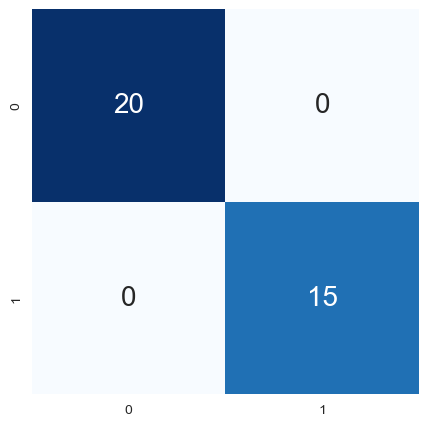

In [ ]:
#region Plot Matriz de Confusão
plt.figure(figsize=(5, 5), dpi=100)

sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    cbar=False,
    fmt="d",
    annot_kws={"size": 20}
);
#endregion

In [ ]:
print(f"Relatório de Classificação:\n {cr}\n")

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        15

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35




### Curva ROC

In [ ]:
#region Curva ROC Binária
def curveROCBinary(model=None):
    y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8), dpi=100)

    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    plt.show()

#endregion

In [ ]:
#region Curva ROC Múltipla
def curveROCMulti():
    # Binarize the output labels for multi-class
    testBin = label_binarize(y_test, classes=np.unique(y_test))
    classes = testBin.shape[1]

    # Train the classifier using OneVsRestClassifier for multi-class support
    classifier = OneVsRestClassifier(SVC(kernel=bestParamns["kernel"], probability=True))
    probabilidades = classifier.fit(X_train, y_train).predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    rocAUC = dict()

    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(testBin[:, i], probabilidades[:, i])
        rocAUC[i] = auc(fpr[i], tpr[i])

    # Plotting the ROC curve for each class
    plt.figure(figsize=(10, 8), dpi=100)

    for i in range(classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {rocAUC[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Taxa de Falso Positivo")
    plt.ylabel("Taxa de Verdadeiro Positivo")
    plt.title("Curva ROC Multiclasse")
    plt.legend(loc="lower right")

    plt.show()

#endregion

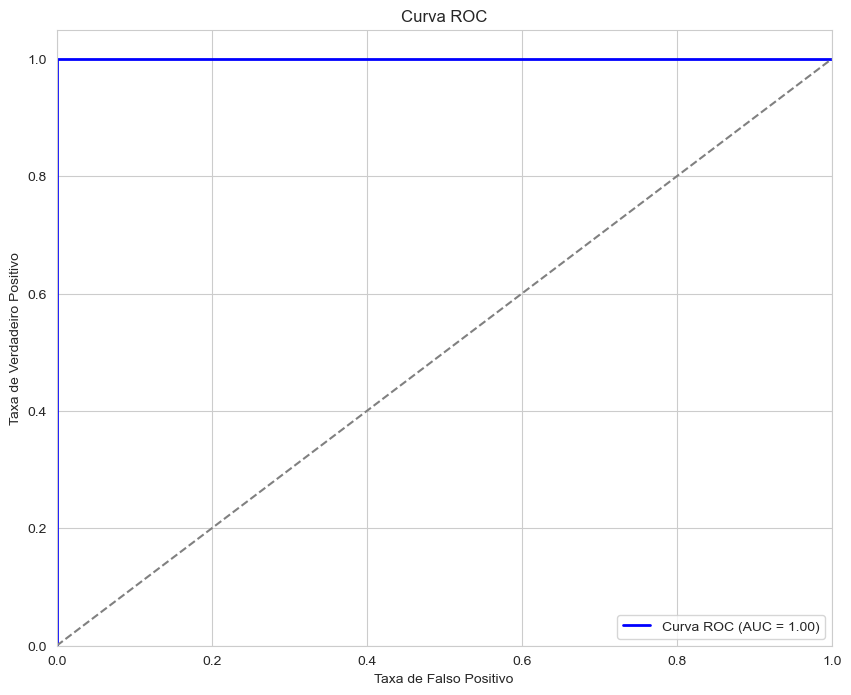

In [ ]:
curveROCBinary(model) if binary else curveROCMulti()

### Gráfico de Dispersão

In [ ]:
#region Gráfico de Dispersão (Bi-dimensional)
def PCABinary():
    pca2D = PCA(n_components=2)
    X_train_2D = pca2D.fit_transform(X_train)
    X_test_2D = pca2D.transform(X_test)

    modelLinear = SVC(C=bestParamns["C"], kernel='linear', random_state=42)
    modelLinear.fit(X_train_2D, y_train)

    # Obter os coeficientes do modelo para calcular as margens
    w = modelLinear.coef_[0]
    a = -w[0] / w[1]
    x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
    y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1

    # Criar uma grade 2D
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Previsões do modelo para cada ponto da grade
    Z = modelLinear.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Ajustar para o formato da grade

    # Calcular as margens superior e inferior
    margin = 1 / np.sqrt(np.sum(modelLinear.coef_ ** 2))
    yyUp = a * xx - (modelLinear.intercept_[0]) / w[1] + np.sqrt(1 + a ** 2) * margin
    yyDown = a * xx - (modelLinear.intercept_[0]) / w[1] - np.sqrt(1 + a ** 2) * margin

    # Plotar as margens no gráfico 2D
    plt.figure(figsize=(10, 6), dpi=100)
    plt.contourf(xx, yy, Z, alpha=0, cmap='Blues')
    scatter = plt.scatter(
        X_test_2D[:, 0],
        X_test_2D[:, 1],
        c=y_test,
        edgecolor='k',
        cmap='coolwarm',
        s=150
    )

    plt.plot(xx[0], yyUp[0], 'k--', label="Margem Superior")
    plt.plot(xx[0], yyDown[0], 'k--', label="Margem Inferior")
    plt.plot(xx[0], a * xx[0] - (modelLinear.intercept_[0]) / w[1], 'k-', label="Linha de Decisão")
    plt.title("Separação das Classes com Margens Máximas", fontsize=16)
    plt.xlabel("Componente Principal 1", fontsize=14)
    plt.ylabel("Componente Principal 2", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.show()

#endregion

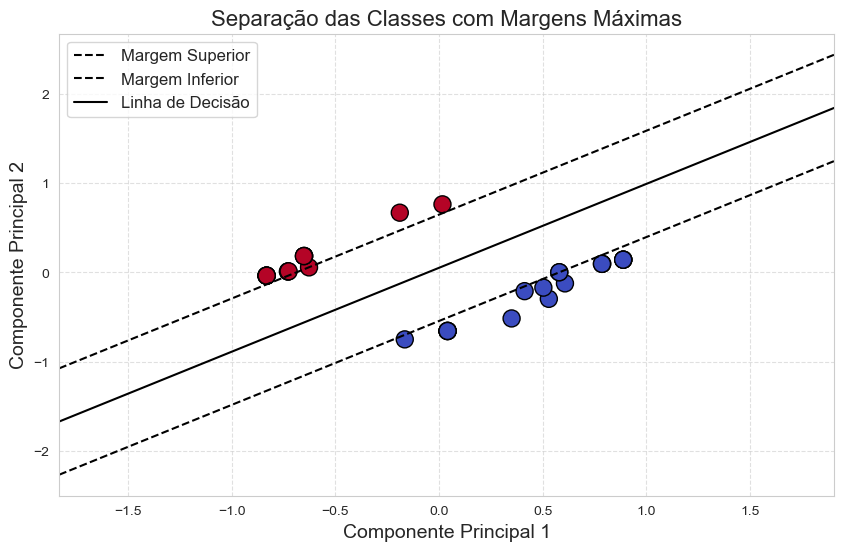

In [ ]:
if binary:
    PCABinary()

## Etapa 8: Resultados (RNA vs SVM)

### Resultado 1: Cristã e Outras (Com Outliers) - **97.22% vs 97.22% / 100% vs 100%**

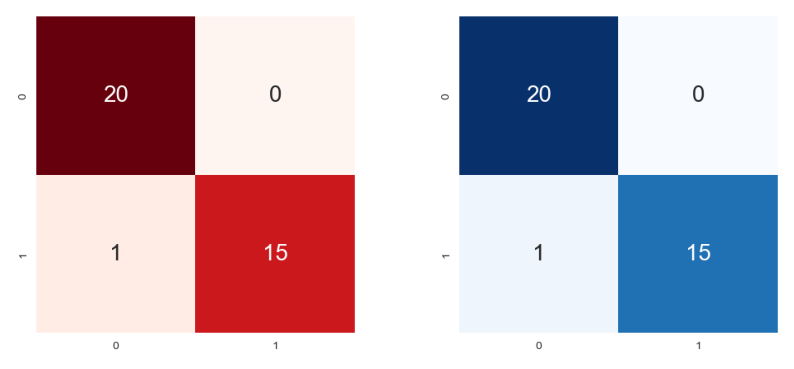

In [ ]:
#region Resultado 1: Cristã e Outras (Com Outliers)
imagem1 = Image.open("figs/RNA-1.png")
imagem2 = Image.open("figs/SVM-1.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

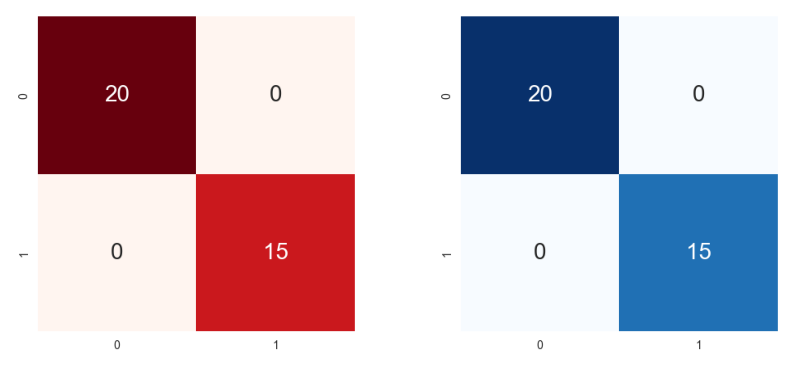

In [ ]:
#region Resultado 1: Cristã e Outras (Com Outliers e reajustando os dados de treino e teste com a função "fixSample")
imagem1 = Image.open("figs/RNA-00.png")
imagem2 = Image.open("figs/SVM-00.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

### Resultado 1: Cristã e Outras (Sem Outliers) - **91.43% vs 91.43%**

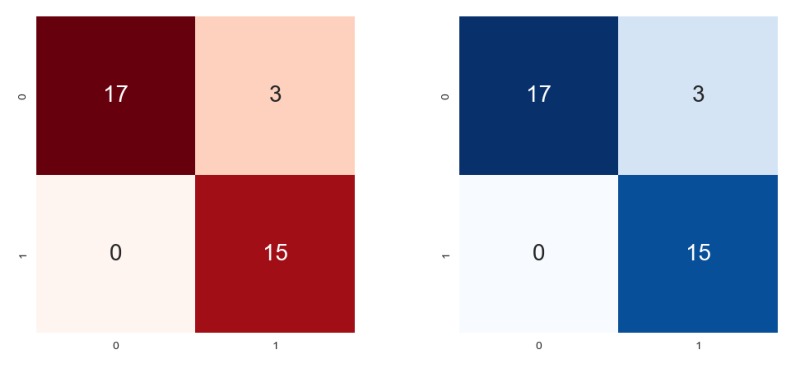

In [ ]:
#region Resultado 1: Cristã e Outras (Sem Outliers)
imagem1 = Image.open("figs/RNA-0.png")
imagem2 = Image.open("figs/SVM-0.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

### Resultado 2: Monoteístas, Politeístas e Outras (Com Outliers) - **80.56% vs 80.56%**

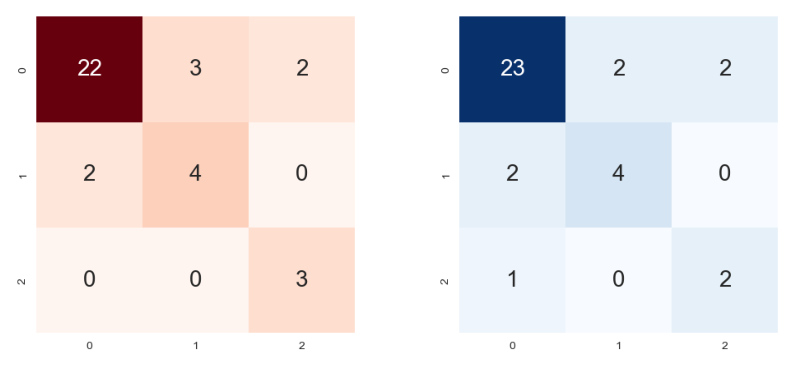

In [ ]:
#region Resultado 2: Monoteístas, Politeístas e Outras (Com Outliers)
imagem1 = Image.open("figs/RNA-3.png")
imagem2 = Image.open("figs/SVM-3.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

### Resultado 2: Monoteístas, Politeístas e Outras (Sem Outliers) - 77.14% vs **82.86%**

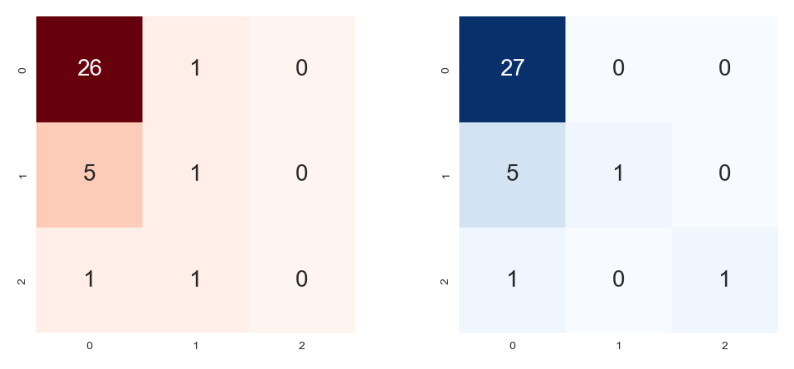

In [ ]:
#region Resultado 2: Monoteístas, Politeístas e Outras (Sem Outliers)
imagem1 = Image.open("figs/RNA-2.png")
imagem2 = Image.open("figs/SVM-2.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

 ### Resultado 3: Ocidental, Oriental e Outras (Com Outliers) - 83.33% vs **86.11%**

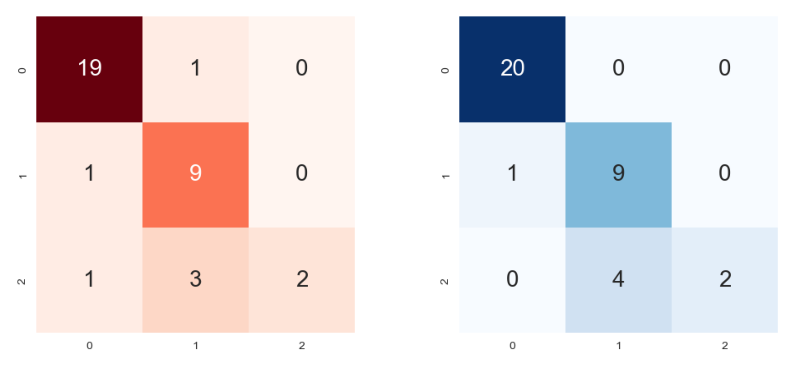

In [ ]:
#region Resultado 3: Ocidental, Oriental e Outras (Com Outliers)
imagem1 = Image.open("figs/RNA-5.png")
imagem2 = Image.open("figs/SVM-5.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

### Resultado 3: Ocidental, Oriental e Outras (Sem Outliers) - **77.14% vs 77.14%**

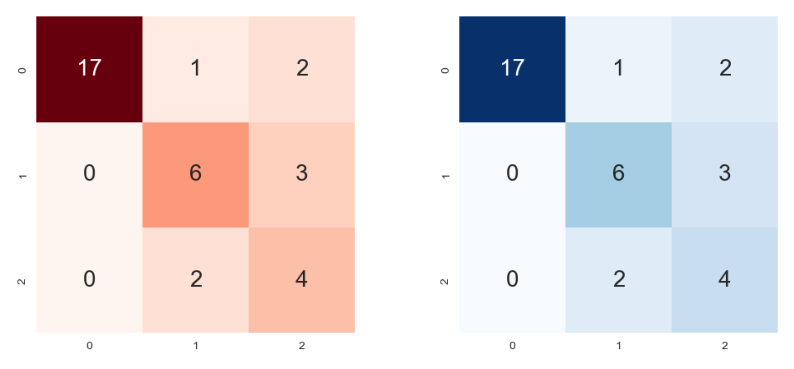

In [ ]:
#region Resultado 3: Ocidental, Oriental e Outras (Sem Outliers)
imagem1 = Image.open("figs/RNA-4.png")
imagem2 = Image.open("figs/SVM-4.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

### Resultado 4: Cristã, Islâmica, Oriental e Outras (Com Outliers) - **75.00%** vs 72.22%

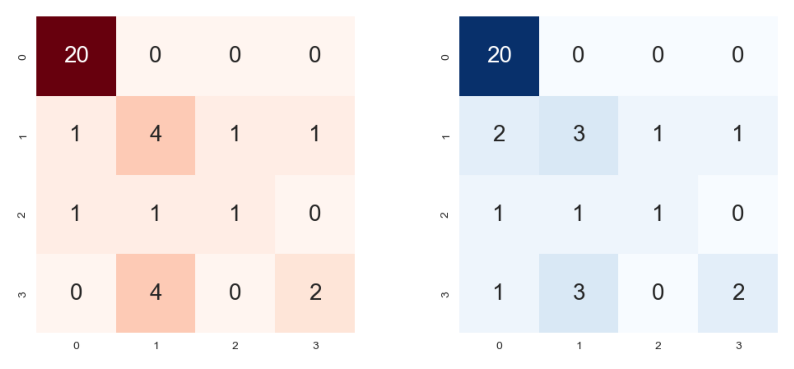

In [ ]:
#region Resultado 4: Cristã, Islâmica, Oriental e Outras (Com Outliers)
imagem1 = Image.open("figs/RNA-7.png")
imagem2 = Image.open("figs/SVM-7.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

### Resultado 4: Cristã, Islâmica, Oriental e Outras (Sem Outliers) - **74.29% vs 74.29%**

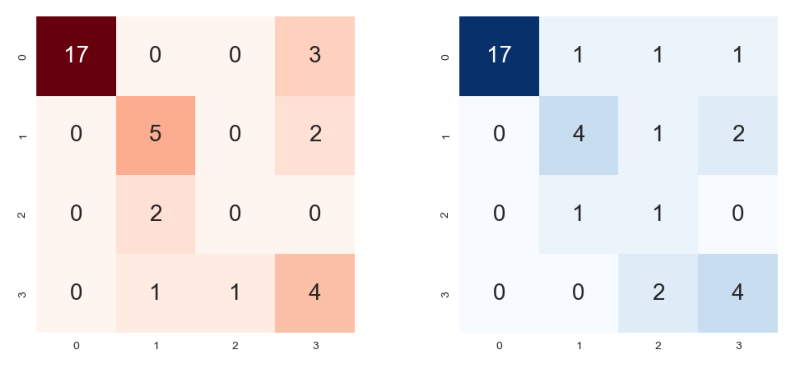

In [ ]:
#region Resultado 4: Cristã, Islâmica, Oriental e Outras (Sem Outliers)
imagem1 = Image.open("figs/RNA-6.png")
imagem2 = Image.open("figs/SVM-6.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem1)
axes[0].axis('off')
axes[1].imshow(imagem2)
axes[1].axis('off')
plt.show()
#endregion

### Resultado 5: Muçulmano e Outras - **75.00%**

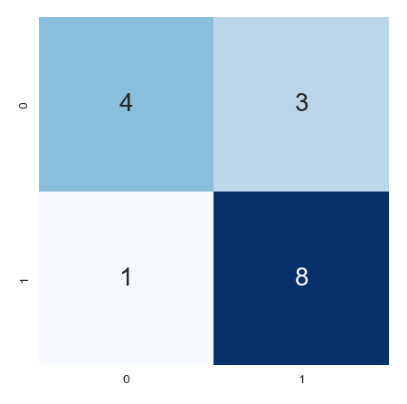

In [ ]:
#region Resultado 5: Muçulmano e Outras
imagem1 = Image.open("figs/SVM-9.png")

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imagem1)
ax.axis('off')
plt.show()
#endregion

### Resultado 6: Muçulmano e Étnicas - **76.92%**




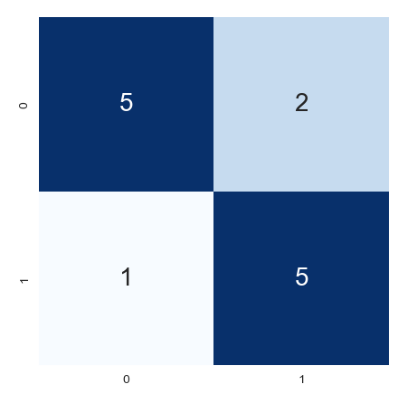

In [ ]:
#region Resultado 6: Muçulmano e Étnicas
imagem1 = Image.open("figs/SVM-10.png")

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imagem1)
ax.axis('off')
plt.show()
#endregion

### Resultado 7: Católico e Étnicas - **92.86%**

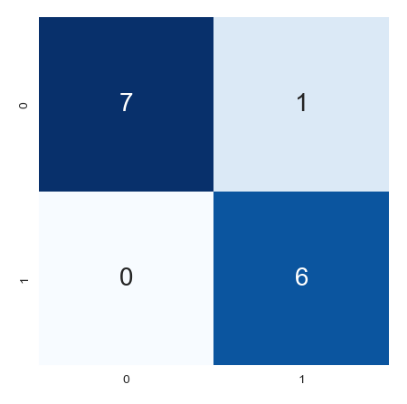

In [ ]:
#region Resultado 7: Católico e Étnicas
imagem1 = Image.open("figs/SVM-11.png")

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imagem1)
ax.axis('off')
plt.show()
#endregion

### Resultado 8: Católico, Muçulmano e Étnica - **85.71%**

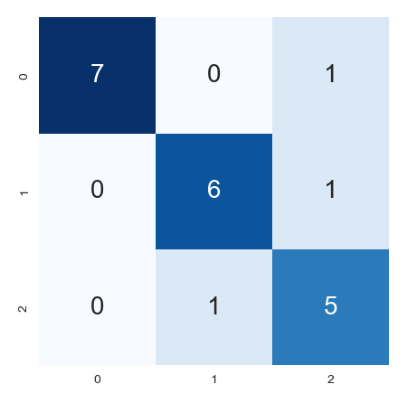

In [ ]:
#region Resultado 8: Católico, Muçulmano e Étnica
imagem1 = Image.open("figs/SVM-13.png")

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imagem1)
ax.axis('off')
plt.show()
#endregion

### Resultado 9: Católico + O. Católico, Muçulmano e Étnica - **81.82%**

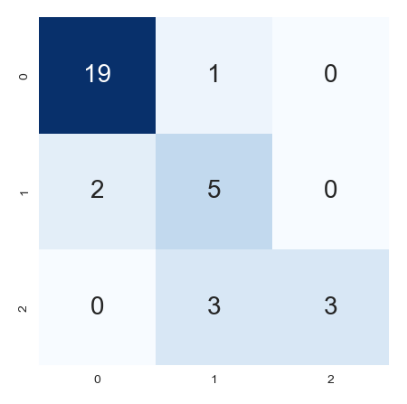

In [ ]:
#region Resultado 9: Católico + O. Católico, Muçulmano e Étnica
imagem1 = Image.open("figs/SVM-14.png")

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imagem1)
ax.axis('off')
plt.show()
#endregion

### Resultado 10: Católico + O. Católico, Muçulmano, Étnica e Outras - **80.00%**

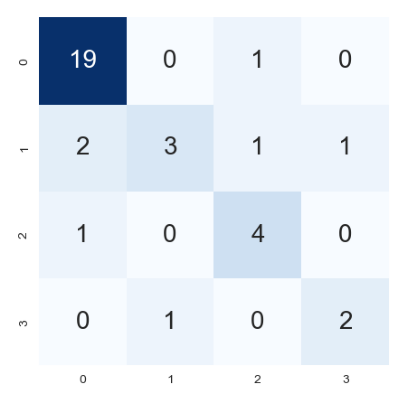

In [ ]:
#region Resultado 10: Católico + O. Católico, Muçulmano, Étnica e Outras
imagem1 = Image.open("figs/SVM-15.png")

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imagem1)
ax.axis('off')
plt.show()
#endregion

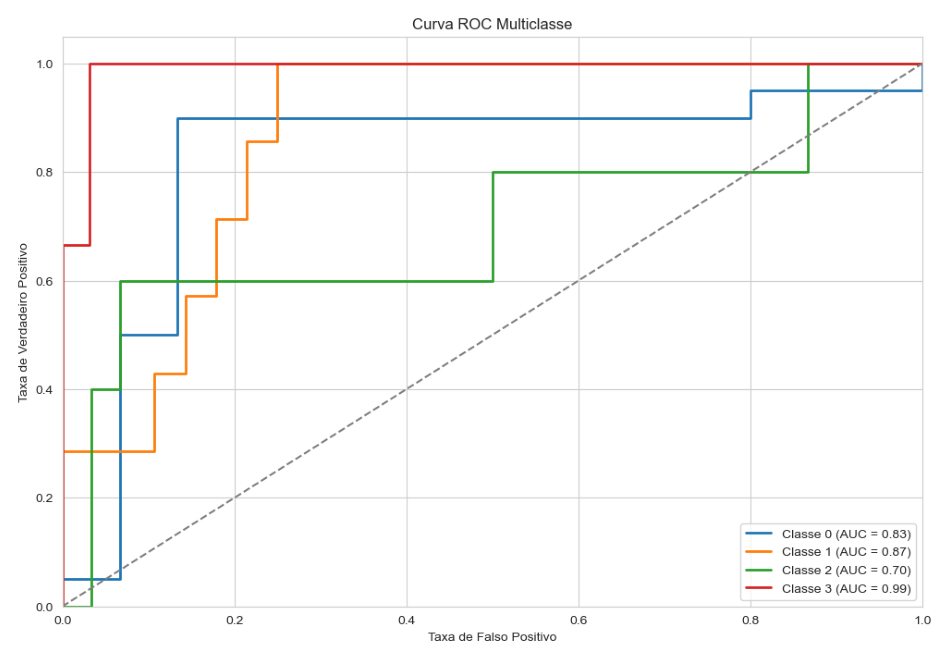

In [ ]:
#region Curva ROC: Católico + O. Católico, Muçulmano, Étnica e Outras
imagem1 = Image.open("figs/SVM-CR-15.png")

fig, ax = plt.subplots(figsize=(12, 12), dpi=100)
ax.imshow(imagem1)
ax.axis('off')
plt.show()
#endregion